In [300]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os

In [301]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
    
    print(len(images), "images resized.")

In [302]:
image_dir_path=os.getenv('HOME')+'/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

image_dir_path2=os.getenv('HOME')+'/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path2)

image_dir_path3=os.getenv('HOME')+'/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path3)

400 images to be resized
400 images resized.
400 images to be resized
400 images resized.
400 images to be resized
400 images resized.


In [303]:
def load_data(img_path, number_of_data=1200):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img=np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx+=1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img=np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx+=1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img=np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx+=1
        
    return imgs,labels

image_dir_path = os.getenv('HOME')+'/aiffel/rock_scissor_paper'
(x_train,y_train)=load_data(image_dir_path)
x_train_norm=x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("Y_train shape: {}".format(y_train.shape))

x_train shape: (1200, 28, 28, 3)
Y_train shape: (1200,)


라벨:  0


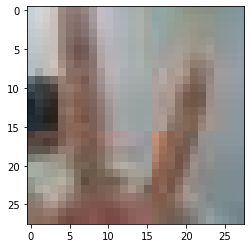

In [304]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ',y_train[0])

In [317]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_100 (Dropout)        (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 800)             

In [318]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
38/38 [==============================] - 1s 3ms/step - loss: 0.1515 - accuracy: 0.9442
Epoch 2/15
38/38 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 3/15
38/38 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9958
Epoch 4/15
38/38 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9967
Epoch 5/15
38/38 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/15
38/38 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9983
Epoch 7/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 8/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/15
38/38 [==============================] - 0s 3ms/step - loss: 5.9474e-04 - accuracy: 1.0000
Epoch 10/15
38/38 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9992
Epoch 11/15
38/

In [319]:
image_dir_path4=os.getenv('HOME')+'/aiffel/rock_scissor_paper/test/scissor'
resize_images(image_dir_path4)

image_dir_path5=os.getenv('HOME')+'/aiffel/rock_scissor_paper/test/rock'
resize_images(image_dir_path5)

image_dir_path6=os.getenv('HOME')+'/aiffel/rock_scissor_paper/test/paper'
resize_images(image_dir_path6)

image_dir_path7=os.getenv('HOME')+'/aiffel/rock_scissor_paper/test'
(x_test, y_test)=load_data(image_dir_path7)
x_test_norm=x_test/255.0

100 images to be resized
100 images resized.
100 images to be resized
100 images resized.
100 images to be resized
100 images resized.


In [320]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

38/38 - 0s - loss: 0.3335 - accuracy: 1.0000
test_loss: 0.3335268199443817
test_accuracy: 1.0
